# Versuch 256 Fluoreszenz - Auswertung
#### Felix Fleischle - 7.3.2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#%matplotlib qt5

In [2]:
Z=np.array([22,26,28,29,30,42,47])
#K_alpha (Ti, Fe , Ni, Cu, Zn , Mo  , Ag) in keV:
K_alpha=np.array([4.90,6.404,7.37,7.99,8.37,17.48,21.96])
K_alpha_lit = np.array([4.511, 6.404, 7.478, 8.048, 8.639,17.48, 22.16])

Delta_K_alpha=np.array([0.19,0.34,0.30,0.29,0.36,0.25,0.21])
sqrt_K_alpha=np.sqrt(K_alpha)
sqrt_K_alpha_err= 0.5 * 1/(np.sqrt(K_alpha)) * Delta_K_alpha

print("Wurzel Kalpha :", sqrt_K_alpha, "+-", sqrt_K_alpha_err)

sigma_alpha = np.abs((K_alpha_lit - K_alpha)/Delta_K_alpha)
print("Abweichungen Energien:", sigma_alpha)

Wurzel Kalpha : [2.21359436 2.53061257 2.71477439 2.82665881 2.89309523 4.18090899
 4.68614981] +- [0.04291663 0.06717741 0.05525321 0.05129731 0.0622171  0.0298978
 0.02240645]
Abweichungen Energien: [2.04736842 0.         0.36       0.2        0.74722222 0.
 0.95238095]


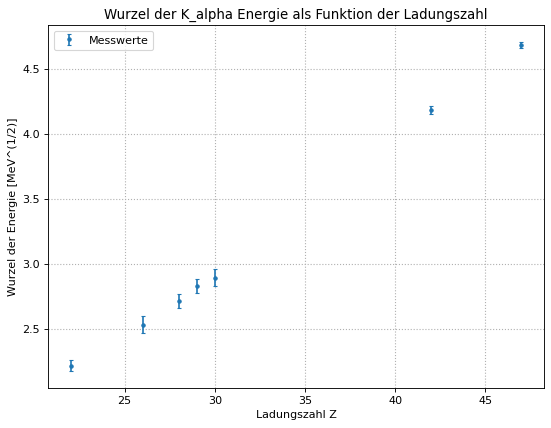

In [3]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Wurzel der K_alpha Energie als Funktion der Ladungszahl')
plt.errorbar(Z, sqrt_K_alpha, linestyle="None", marker = ".", yerr = sqrt_K_alpha_err, capsize = 2, label="Messwerte")
plt.legend()
plt.xlabel("Ladungszahl Z")
plt.ylabel("Wurzel der Energie [MeV^(1/2)]")
plt.grid(linestyle=":", linewidth=1)

In [4]:
n1=1
n2=2
def fit_func(x, sqrt_Er, sig12):
    return sqrt_Er*(x-sig12)*np.sqrt(1/n1**2-1/n2**2)

popt, pcov=curve_fit(fit_func, Z, sqrt_K_alpha, sigma=sqrt_K_alpha_err)

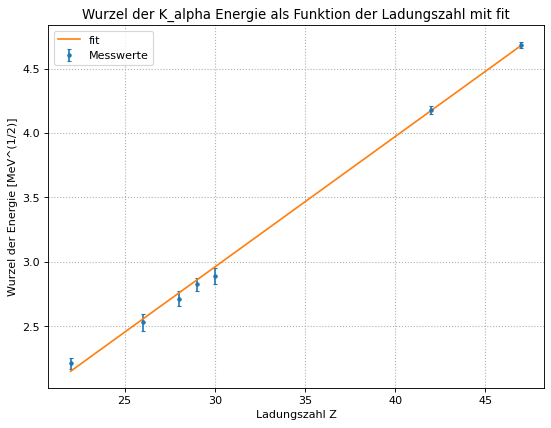

In [5]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Wurzel der K_alpha Energie als Funktion der Ladungszahl mit fit')
plt.errorbar(Z, sqrt_K_alpha, linestyle="None", marker = ".", yerr = sqrt_K_alpha_err, capsize = 2, label="Messwerte")
plt.plot(Z, fit_func(Z,*popt), label="fit")
plt.legend()
plt.xlabel("Ladungszahl Z")
plt.ylabel("Wurzel der Energie [MeV^(1/2)]")
plt.grid(linestyle=":", linewidth=1)

In [6]:
print("sqrt_Er=",popt[0], ",Standardfehler=",np.sqrt(pcov[0][0]))
print("sig12=",popt[1], ",Standardfehler=",np.sqrt(pcov[1][1]))

sqrt_Er= 0.11695031089372009 ,Standardfehler= 0.0016831401143132022
sig12= 0.7732047019454178 ,Standardfehler= 0.5592452002395191


In [7]:
E_ryd_alpha = popt[0]**2
E_ryd_alpha_err = 2*popt[0]*np.sqrt(pcov[0,0])
print("Rydbergenergie:", E_ryd_alpha, "+-", E_ryd_alpha_err)

E_ryd_lit = 0.013605 #keV
sigma_eryd_alpha = np.abs((E_ryd_lit - E_ryd_alpha)/E_ryd_alpha_err)
print("Abweichung:", sigma_eryd_alpha)

Rydbergenergie: 0.013677375218137782 +- 0.0003936875192932411
Abweichung: 0.18383924963562903


In [8]:
# alles für beta:
#Z=np.array([22,26,28,29,30,42,47])
#K_alpha (Ti, Fe , Ni, Cu, Zn , Mo  , Ag) in keV:
K_beta=np.array([4.90,7.058,8.01,8.71,9.10,19.61,24.59])
K_beta_lit = np.array([4.932, 7.058, 8.265, 8.905, 9.572, 19.61, 24.94])
Delta_K_beta=np.array([0.19,0.34,0.30,0.32,0.39,0.25,0.22])
sqrt_K_beta=np.sqrt(K_beta)
sqrt_K_beta_err= 0.5 * 1/(np.sqrt(K_beta)) * Delta_K_beta

print("Wurzel Kbeta :", sqrt_K_beta, "+-", sqrt_K_beta_err)

sigma_beta = np.abs((K_beta_lit - K_beta)/Delta_K_beta)
print("Abweichungen Energien:", sigma_beta)

Wurzel Kbeta : [2.21359436 2.65668967 2.83019434 2.95127091 3.01662063 4.42831797
 4.95883051] +- [0.04291663 0.06398941 0.05299989 0.05421393 0.06464187 0.02822742
 0.02218265]
Abweichungen Energien: [0.16842105 0.         0.85       0.609375   1.21025641 0.
 1.59090909]


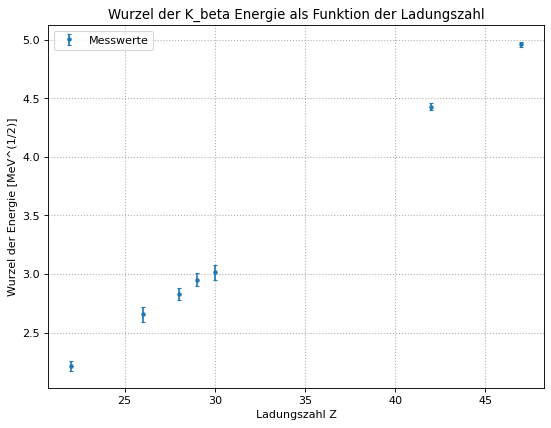

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Wurzel der K_beta Energie als Funktion der Ladungszahl')
plt.errorbar(Z, sqrt_K_beta, linestyle="None", marker = ".", yerr = sqrt_K_beta_err, capsize = 2, label="Messwerte")
plt.legend()
plt.xlabel("Ladungszahl Z")
plt.ylabel("Wurzel der Energie [MeV^(1/2)]")
plt.grid(linestyle=":", linewidth=1)

In [10]:
n1_beta=1
n2_beta=3
def fit_func_beta(x, sqrt_Er, sig12):
    return sqrt_Er*(x-sig12)*np.sqrt(1/n1_beta**2-1/n2_beta**2)

popt_beta, pcov_beta=curve_fit(fit_func_beta, Z, sqrt_K_beta, sigma=sqrt_K_beta_err)

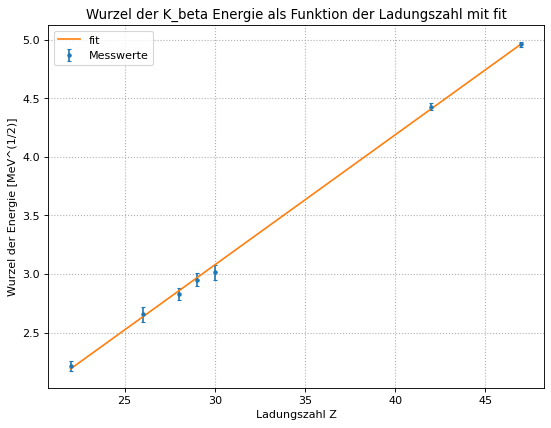

In [11]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Wurzel der K_beta Energie als Funktion der Ladungszahl mit fit')
plt.errorbar(Z, sqrt_K_beta, linestyle="None", marker = ".", yerr = sqrt_K_beta_err, capsize = 2, label="Messwerte")
plt.plot(Z, fit_func_beta(Z,*popt_beta), label="fit")
plt.legend()
plt.xlabel("Ladungszahl Z")
plt.ylabel("Wurzel der Energie [MeV^(1/2)]")
plt.grid(linestyle=":", linewidth=1)

In [12]:
print("sqrt_Er=",popt_beta[0], ",Standardfehler=",np.sqrt(pcov_beta[0][0]))
print("sig12=",popt_beta[1], ",Standardfehler=",np.sqrt(pcov_beta[1][1]))

sqrt_Er= 0.11764915206503729 ,Standardfehler= 0.0010532878336782035
sig12= 2.2450336327333646 ,Standardfehler= 0.33626686959078605


In [13]:
E_ryd_beta = popt_beta[0]**2
E_ryd_beta_err = 2*popt_beta[0] * np.sqrt(pcov_beta[0,0])
print("Rydbergenergie:", E_ryd_beta, "+-", E_ryd_beta_err)

sigma_eryd_beta = np.abs((E_ryd_lit - E_ryd_beta)/E_ryd_beta_err)
print("Abweichung:", sigma_eryd_beta)

Rydbergenergie: 0.013841322981622267 +- 0.00024783684102532136
Abweichung: 0.9535425832760746
